# Singular Value Decomposition

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Singular value decomposition 
    - Dimensionality reduction of data
    - Image compression
- `scipy` implementation
    - Singular value decomposition by [`scipy.linalg.svd()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html)

## Singular value decomposition and approximations

Singular value decomposition (SVD) decomposes a matrix $\mathbf{A}$ into the product of left singular matrix $\mathbf{U}$, singular value matrix $\mathbf{\Sigma}$, and the complex conjugate of right singular matrix $\mathbf{V}^*$:

$$
\mathbf{A = U\Sigma V^*}
$$

$\mathbf{U}$ has left singular vectors $\mathbf{u}_k$ in its columns. $\mathbf{\Sigma}$ is a diagonal matrix with singular values $\sigma_k$ on its diagonal. $\mathbf{V}$ has right singular vectors $\mathbf{v}_k$ in its columns.

SVD can also be written as

$$
\mathbf{A} = \sum_{k=1}^n \sigma_k \mathbf{u}_k \mathbf{v}_k^*
$$

so we can approximate the matrix $\mathbf{A}$ by taking only the first few terms. For example the rank-1 approximation is 

$$
\mathbf{A} \approx \mathbf{A}_1 = \sum_{k=1}^1 \sigma_k \mathbf{u}_k \mathbf{v}_k^* = \sigma_1 \mathbf{u}_1 \mathbf{v}_1^*
$$

It minimizes the sum of squares of perpendicular distance from the data points (if the columns of $\mathbf{A}$ are viewed as coordinates). It also captures the most variance (information) in the data.

## Dimensionality reduction of data

**Problem Statement.** Singular value decomposition of linear data.

(a) Generate a linear data of the form $f(x) = x$ in the domain $[0, 5]$ and add a random noise in the range of $[0, 1)$. Change the 4th data point to 1 to create an outlier.

(b) Decompose the linear data using singular value decomposition by [`scipy.linalg.svd()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) and take its rank-1 approximation.

(c) Plot the data and its rank-1 approximation as a line and as points.

In [1]:
import numpy as np
import scipy
from scipy import linalg
import random
import matplotlib.pyplot as plt

In [2]:
# generate data
random.seed(1)
linear_data_x = np.arange(0, 5.25, 0.25)
linear_data_y = np.array([i + random.random() for i in linear_data_x])
X = np.array([linear_data_x, linear_data_y])

In [3]:
# singular value decomposition
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)
S = np.diag(s)

In [4]:
# rank-1 approx
X_rank1 = S[0, 0] * np.outer(U[:, 0], Vh[0, :])
X_rank1

array([[0.06659661, 0.6524675 , 0.84344595, 0.82375337, 1.17533243,
        1.38500408, 1.7176178 , 2.01802888, 1.90606842, 2.1060413 ,
        2.73867512, 2.77137569, 3.16713975, 3.02280876, 3.47496112,
        3.84427762, 3.83247952, 4.42005492, 4.63076781, 4.43158733,
        4.66148114],
       [0.0760325 , 0.7449138 , 0.96295146, 0.94046869, 1.341862  ,
        1.58124144, 1.96098227, 2.30395776, 2.17613394, 2.40444042,
        3.12671036, 3.16404418, 3.61588294, 3.4511021 , 3.96731867,
        4.38896258, 4.37549285, 5.04632016, 5.28688838, 5.05948657,
        5.3219534 ]])

In [5]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

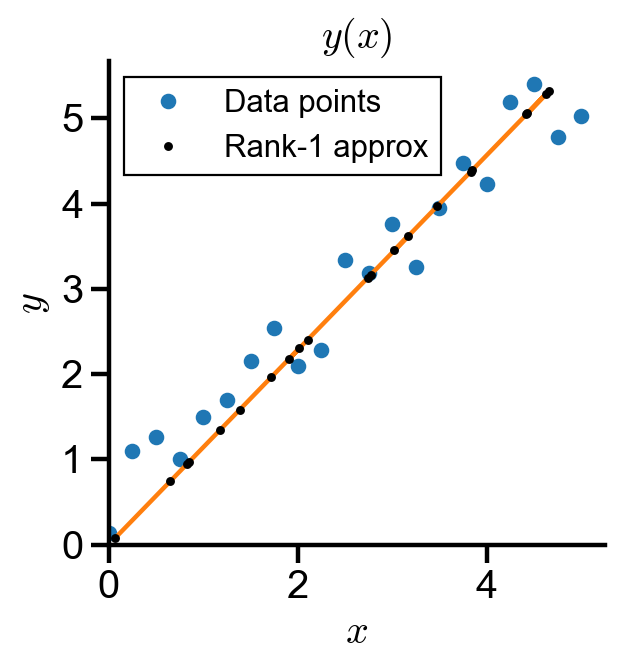

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(linear_data_x, linear_data_y, 'o', label='Data points')
ax.plot(X_rank1[0, :], X_rank1[1, :])
ax.plot(X_rank1[0, :], X_rank1[1, :], '.', color='black', label='Rank-1 approx')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$y(x)$')
ax.set_xlim(0)
ax.set_ylim(0)
ax.legend()

## Image compression

SVD can reducing the dimension of the image by only storing the top rank approximations. Compared to storing the full image matrix, storing the factorized matrices uses up much smaller space.

**Problem Statement.** Singular value decomposition for image compression.

(a) Import the image `dog.jpg` and perform singular value decomposition.

(b) Examine the magnitude of singular values in a semilogy plot.

(c) Examine the energy captured by rank-r approximations, where r is an integer.

(d) Visualize rank-1, 10, and 50 approximations of the image and calculate the energy captured and the compression rate of each approximation.

### Import and view images

In [7]:
import skimage
from skimage import io

In [8]:
img = io.imread('dog.jpg')
img.shape

(327, 327, 3)

In [9]:
gray_img = skimage.color.rgb2gray(img)
gray_img.shape

(327, 327)

(-0.5, 326.5, 326.5, -0.5)

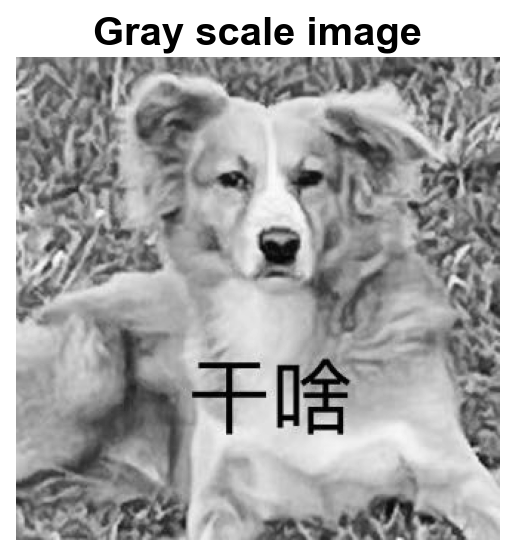

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(gray_img, cmap='gray')
ax.set_title('Gray scale image')
ax.axis('off')

In [11]:
# singular value decomposition
U, s, Vh = scipy.linalg.svd(gray_img, full_matrices=False)
S = np.diag(s)

### Value of singular values

A few singular values are greater than others and stores the most information.

Text(0.5, 1.0, 'Singular values')

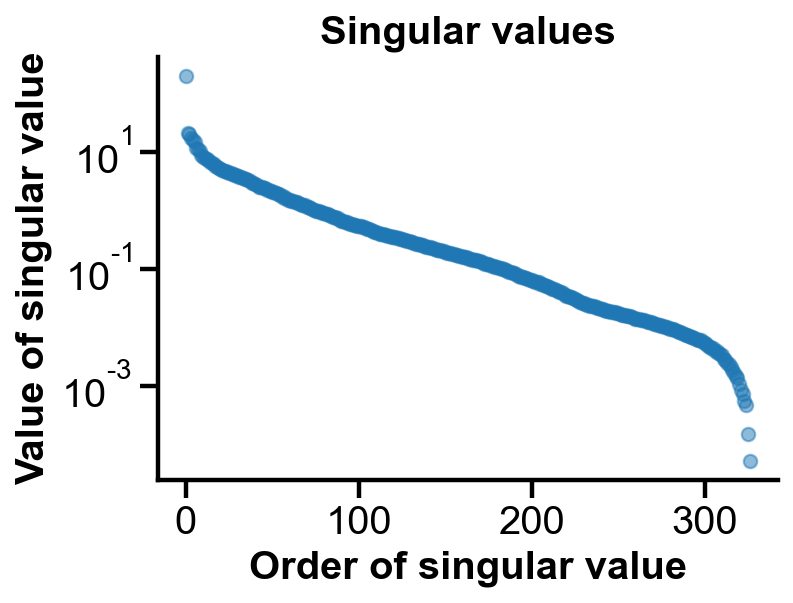

In [12]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.semilogy(np.arange(len(s)), s, 'o', alpha=0.5)
ax.set_xlabel('Order of singular value')
ax.set_ylabel('Value of singular value')
ax.set_title('Singular values')
# ax.set_xlim(0)

### Energy of approximations

Rank-1 approximation alone can store 40% of the information. To stores 80% information, about rank-50 approximation could be used.

In [13]:
energies = np.cumsum(s) / np.sum(s)

(0.0, 1.0332684596481563)

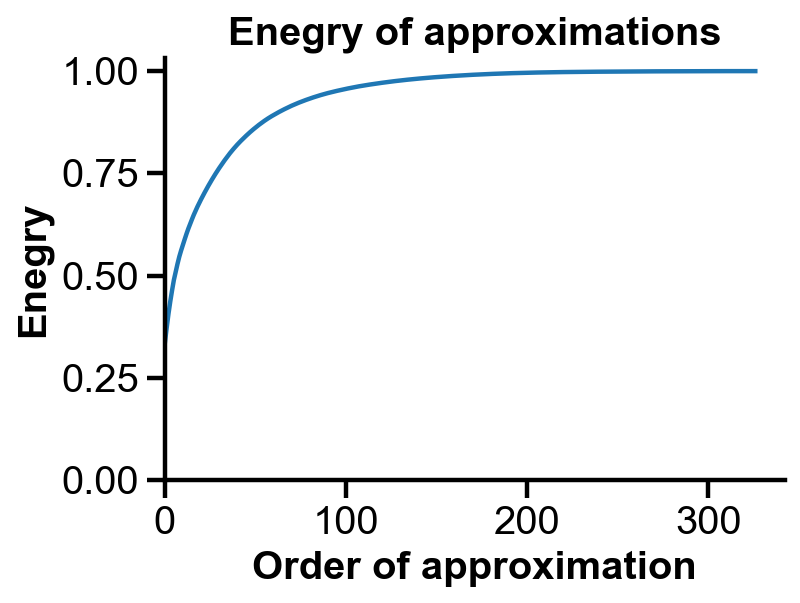

In [14]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(np.arange(len(s)), energies)
ax.set_xlabel('Order of approximation')
ax.set_ylabel('Enegry')
ax.set_title('Enegry of approximations')
ax.set_xlim(0)
ax.set_ylim(0)

### Visualizations of approximations

We visualize lower rank approximations and calculate the energy and compression rate of each approximation.

In [15]:
# rank 1 approx
img_rank1 = U[:, 0:1] @ S[0:1, 0:1] @ Vh[0:1, :]

In [16]:
# energy of rank 1 approx
energy_rank1 = np.sum(s[:1]) / np.sum(s)
round(energy_rank1, 2)

0.33

In [17]:
# compression rate
compression_rate =  (U.shape[0]*1 + 1 + Vh.shape[0]*1 ) / gray_img.size
round(compression_rate, 4)

0.0061

(-0.5, 326.5, 326.5, -0.5)

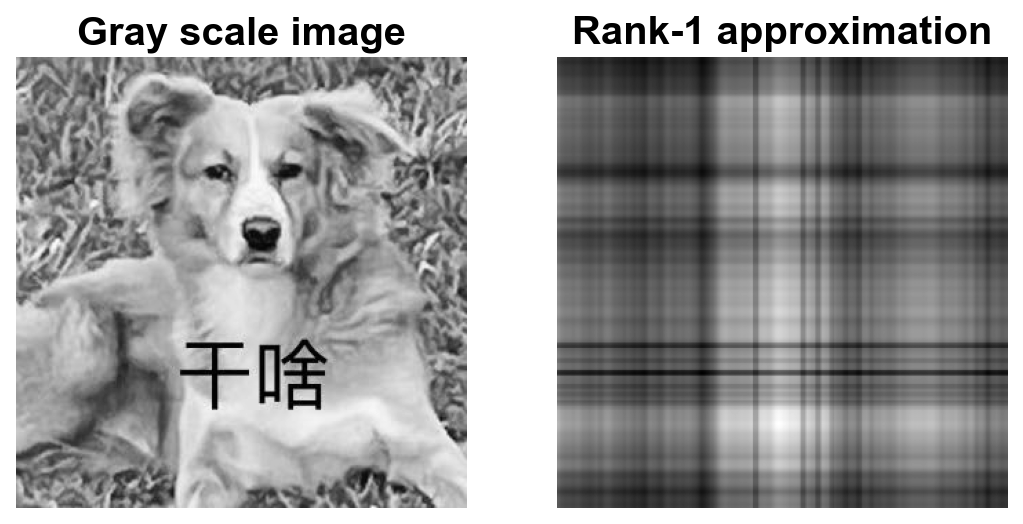

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(gray_img, cmap='gray')
axs[0].set_title('Gray scale image')
axs[0].axis('off')

axs[1].imshow(img_rank1, cmap='gray')
axs[1].set_title('Rank-1 approximation')
axs[1].axis('off')

In [19]:
# rank 10 approx
r = 10
img_rank10 = U[:, 0:r] @ S[0:r, 0:r] @ Vh[0:r, :]

In [20]:
# energy of rank 10 approx
energy_rank10 = np.sum(s[:r]) / np.sum(s)
round(energy_rank10, 2)

0.56

In [21]:
# compression rate
compression_rate =  (U.shape[0]*r + r + Vh.shape[0]*r ) / gray_img.size
round(compression_rate, 4)

0.0613

(-0.5, 326.5, 326.5, -0.5)

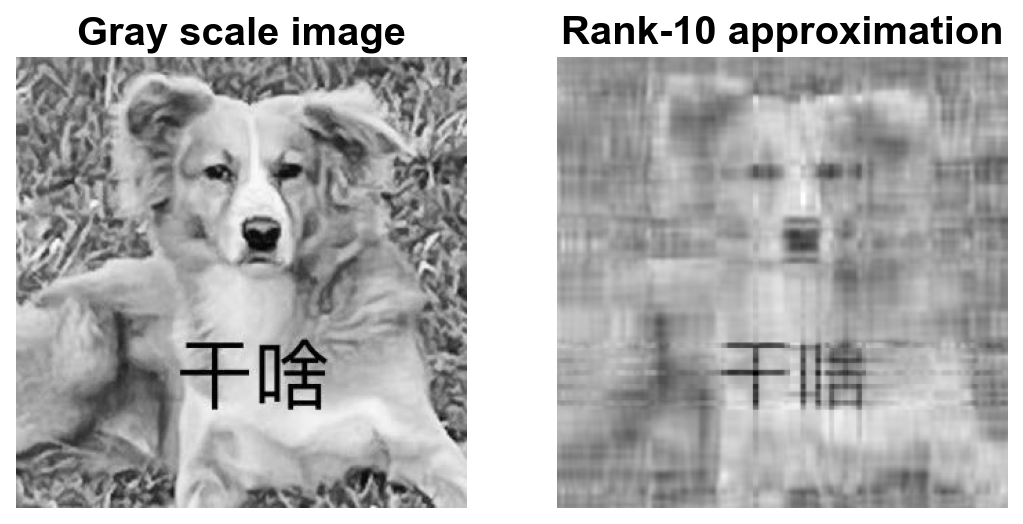

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(gray_img, cmap='gray')
axs[0].set_title('Gray scale image')
axs[0].axis('off')

axs[1].imshow(img_rank10, cmap='gray')
axs[1].set_title(f'Rank-{r} approximation')
axs[1].axis('off')

In [23]:
# rank r approx
r = 50
img_rank_r = U[:, 0:r] @ S[0:r, 0:r] @ Vh[0:r, :]

In [24]:
# energy of rank r approx
energy_rank_r = np.sum(s[:r]) / np.sum(s)
round(energy_rank_r, 2)

0.86

In [25]:
# compression rate
compression_rate =  (U.shape[0]*r + r + Vh.shape[0]*r ) / gray_img.size
round(compression_rate, 4)

0.3063

(-0.5, 326.5, 326.5, -0.5)

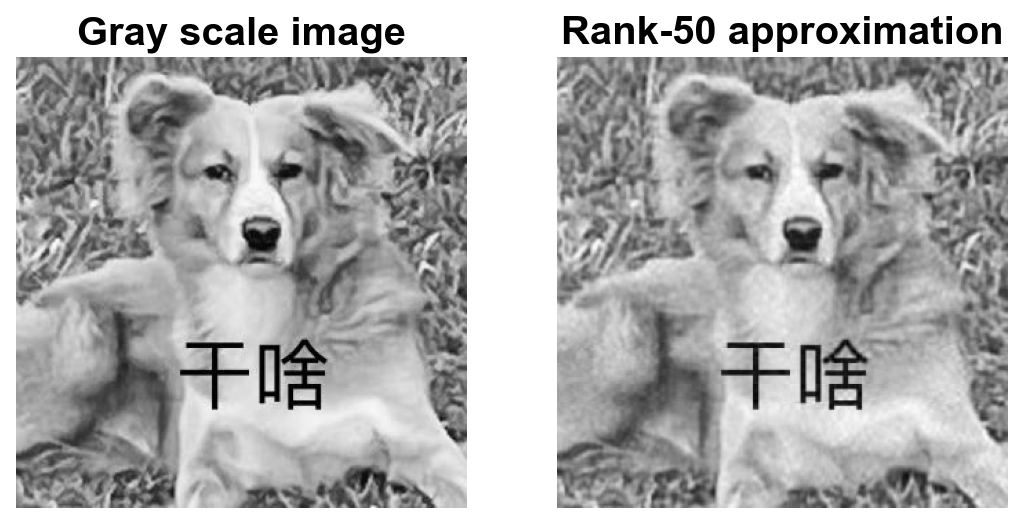

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(gray_img, cmap='gray')
axs[0].set_title('Gray scale image')
axs[0].axis('off')

axs[1].imshow(img_rank_r, cmap='gray')
axs[1].set_title(f'Rank-{r} approximation')
axs[1].axis('off')